In [1]:
import pandas as pd

In [11]:
import pandas as pd

# Load the CSV data
df = pd.read_csv('/home/saurabh/Projects/session_based_recommenders/data/OnlineRetail.csv', encoding = 'unicode_escape'

)

In [7]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [9]:
df["Description"].value_counts()[:10]

WHITE HANGING HEART T-LIGHT HOLDER    2369
REGENCY CAKESTAND 3 TIER              2200
JUMBO BAG RED RETROSPOT               2159
PARTY BUNTING                         1727
LUNCH BAG RED RETROSPOT               1638
ASSORTED COLOUR BIRD ORNAMENT         1501
SET OF 3 CAKE TINS PANTRY DESIGN      1473
PACK OF 72 RETROSPOT CAKE CASES       1385
LUNCH BAG  BLACK SKULL.               1350
NATURAL SLATE HEART CHALKBOARD        1280
Name: Description, dtype: int64

In [10]:
import numpy as np
import pandas as pd
import seaborn as sns
import datetime as dt
import matplotlib.pyplot as plt
%matplotlib inline

In [42]:
df = pd.read_csv('/home/saurabh/Projects/session_based_recommenders/data/OnlineRetail.csv', encoding = 'unicode_escape')

In [15]:
# Get total unique customers
total_unique_customers = df['CustomerID'].nunique()

# Get total unique items (descriptions)
total_unique_items = df['Description'].nunique()

print("Total Unique Customers:", total_unique_customers)
print("Total Unique Items:", total_unique_items)

Total Unique Customers: 4372
Total Unique Items: 4223


In [33]:
# Calculate the total revenue for each row (Quantity * UnitPrice)
df['TotalRevenue'] = df['Quantity'] * df['UnitPrice']

# Calculate the overall total revenue
total_revenue = df['TotalRevenue'].sum()

print(f"Total Revenue: {total_revenue}")
total_revenue_in_currency = 9747747.933999998
total_revenue_in_million_euro = total_revenue_in_currency / 1000000

print(f"Total Revenue in Million Euro: {total_revenue_in_million_euro:.2f} million euros")


Total Revenue: 9747747.933999998
Total Revenue in Million Euro: 9.75 million euros


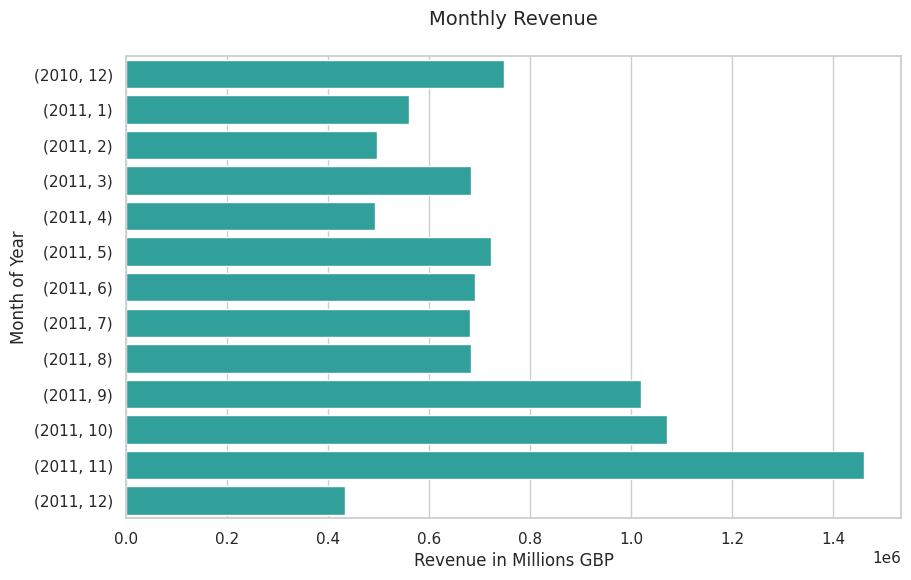

In [41]:
#Adding columns: invoice_value,Year, Month, Day and Date to online dataframe
df['invoice_value'] = df['Quantity']*df['UnitPrice']
df['Year'] = pd.DatetimeIndex(df['InvoiceDate']).year
df['Month'] = pd.DatetimeIndex(df['InvoiceDate']).month
df['Day'] =  pd.DatetimeIndex(df['InvoiceDate']).day
df['Date'] = pd.DatetimeIndex(df['InvoiceDate']).date

#Monthly revenue is sum up all 'invoice_value' in a month
monthly = df.groupby(['Year', 'Month'])['invoice_value'].sum()
monthly = monthly.to_frame()
monthly = monthly.set_index(pd.Index(monthly.index))

#Plotting the monthly revenue
sns.set_style('whitegrid')
h = sns.barplot(x = 'invoice_value', y = monthly.index, data = monthly, color = 'lightseagreen')
h.figure.set_size_inches(10, 6)
h.set_xlabel('Revenue in Millions GBP', size = 12)
h.set_ylabel('Month of Year', size = 12)
h.set_title('Monthly Revenue', size = 14, y = 1.05)
plt.show()

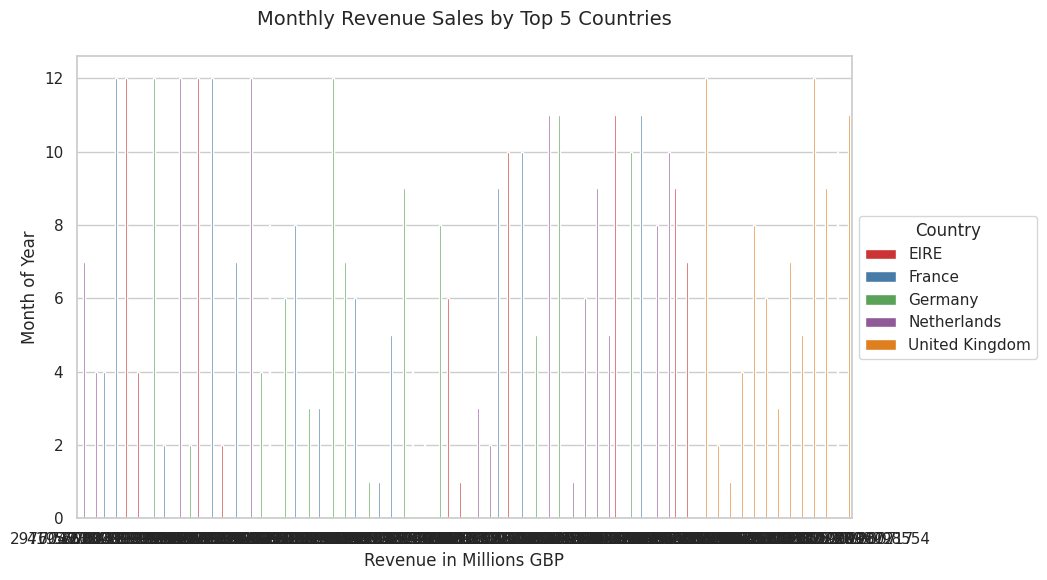

In [44]:


# Convert the InvoiceDate to a datetime type
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'], format='%m/%d/%Y %H:%M')

# Adding columns
df['invoice_value'] = df['Quantity'] * df['UnitPrice']
df['Year'] = pd.DatetimeIndex(df['InvoiceDate']).year
df['Month'] = pd.DatetimeIndex(df['InvoiceDate']).month
df['Day'] = pd.DatetimeIndex(df['InvoiceDate']).day
df['Date'] = pd.DatetimeIndex(df['InvoiceDate']).date

# Calculate the monthly revenue for each country
monthly_revenue_by_country = df.groupby(['Country', 'Year', 'Month'])['invoice_value'].sum().reset_index()

# Get the top 5 countries based on total revenue
top_5_countries = monthly_revenue_by_country.groupby('Country')['invoice_value'].sum().nlargest(5).index

# Filter the data for the top 5 countries
top_5_countries_data = monthly_revenue_by_country[monthly_revenue_by_country['Country'].isin(top_5_countries)]

# Plotting the monthly revenue for top 5 countries
sns.set_style('whitegrid')
h = sns.barplot(x='invoice_value', y='Month', hue='Country', data=top_5_countries_data, palette='Set1')
h.figure.set_size_inches(10, 6)
h.set_xlabel('Revenue in Millions GBP', size=12)
h.set_ylabel('Month of Year', size=12)
h.set_title('Monthly Revenue Sales by Top 5 Countries', size=14, y=1.05)
plt.legend(title='Country', loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()


1.

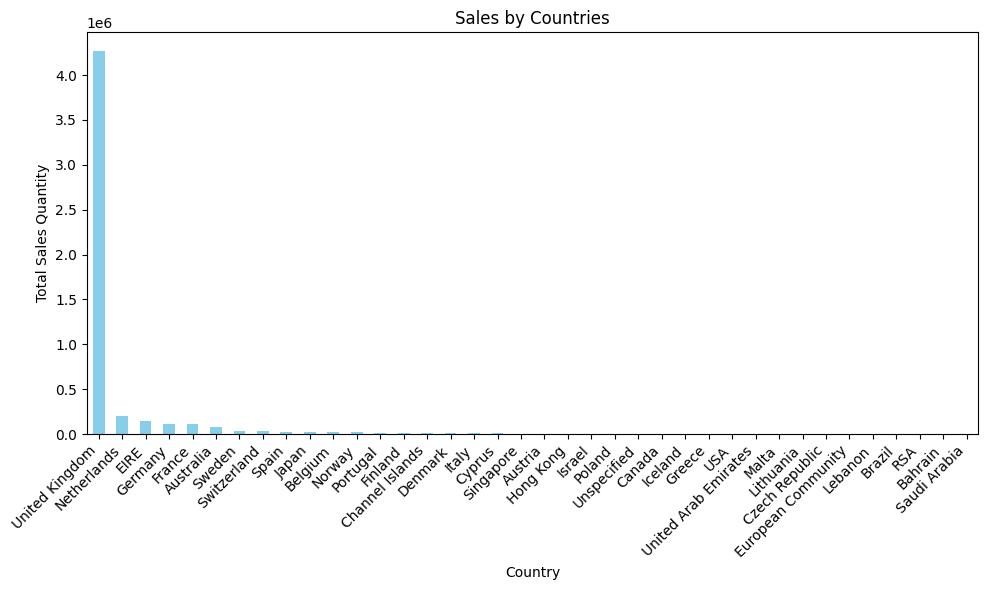

In [16]:

# Sales by Countries (Bar Plot) : Exclude UK 
sales_by_countries = df.groupby('Country')['Quantity'].sum().sort_values(ascending=False)
sales_by_countries.plot(kind='bar', figsize=(10, 6), color='skyblue')
plt.xlabel('Country')
plt.ylabel('Total Sales Quantity')
plt.title('Sales by Countries')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

2. RFM : % addition

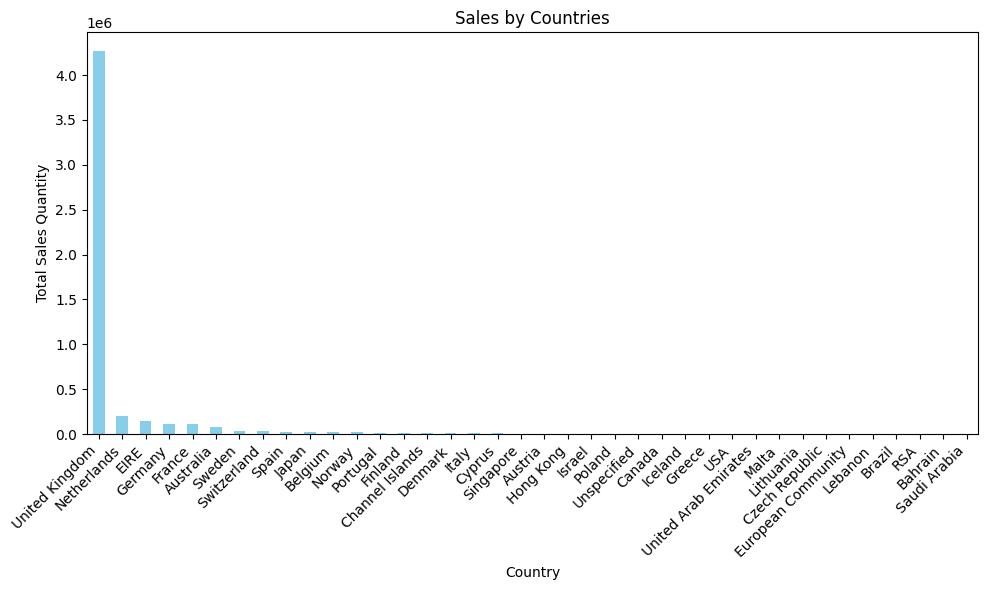

{"United Kingdom": 4263829, "Netherlands": 200128, "EIRE": 142637, "Germany": 117448, "France": 110480, "Australia": 83653, "Sweden": 35637, "Switzerland": 30325, "Spain": 26824, "Japan": 25218, "Belgium": 23152, "Norway": 19247, "Portugal": 16180, "Finland": 10666, "Channel Islands": 9479, "Denmark": 8188, "Italy": 7999, "Cyprus": 6317, "Singapore": 5234, "Austria": 4827, "Hong Kong": 4769, "Israel": 4353, "Poland": 3653, "Unspecified": 3300, "Canada": 2763, "Iceland": 2458, "Greece": 1556, "USA": 1034, "United Arab Emirates": 982, "Malta": 944, "Lithuania": 652, "Czech Republic": 592, "European Community": 497, "Lebanon": 386, "Brazil": 356, "RSA": 352, "Bahrain": 260, "Saudi Arabia": 75}


In [30]:
import json
# Sales by Countries (Bar Plot)
sales_by_countries = df.groupby('Country')['Quantity'].sum().sort_values(ascending=False)
sales_by_countries.plot(kind='bar', figsize=(10, 6), color='skyblue')
plt.xlabel('Country')
plt.ylabel('Total Sales Quantity')
plt.title('Sales by Countries')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Convert the pandas Series to a dictionary
sales_by_countries_dict = sales_by_countries.to_dict()

# Store the dictionary as a JSON object
json_object = json.dumps(sales_by_countries_dict)
print(json_object)

In [18]:

# Count of Top 10 Selling Items by Country
top_10_items_by_country = df.groupby(['Country', 'Description'])['Quantity'].sum().reset_index()
top_10_items_by_country = top_10_items_by_country.sort_values(by='Quantity', ascending=False).groupby('Country').head(10)
top_10_items_by_country


,Country,Description,Quantity
19618,United Kingdom,WORLD WAR 2 GLIDERS ASSTD DESIGNS,48326
17488,United Kingdom,JUMBO BAG RED RETROSPOT,43167
18355,United Kingdom,POPCORN HOLDER,34365
15872,United Kingdom,ASSORTED COLOUR BIRD ORNAMENT,33679
19528,United Kingdom,WHITE HANGING HEART T-LIGHT HOLDER,33193
...,...,...,...
919,Bahrain,GREEN REGENCY TEACUP AND SAUCER,6
927,Bahrain,ROSE SCENT CANDLE IN JEWELLED BOX,6
928,Bahrain,ROSES REGENCY TEACUP AND SAUCER,6
12860,Saudi Arabia,GOLD EAR MUFF HEADPHONES,2


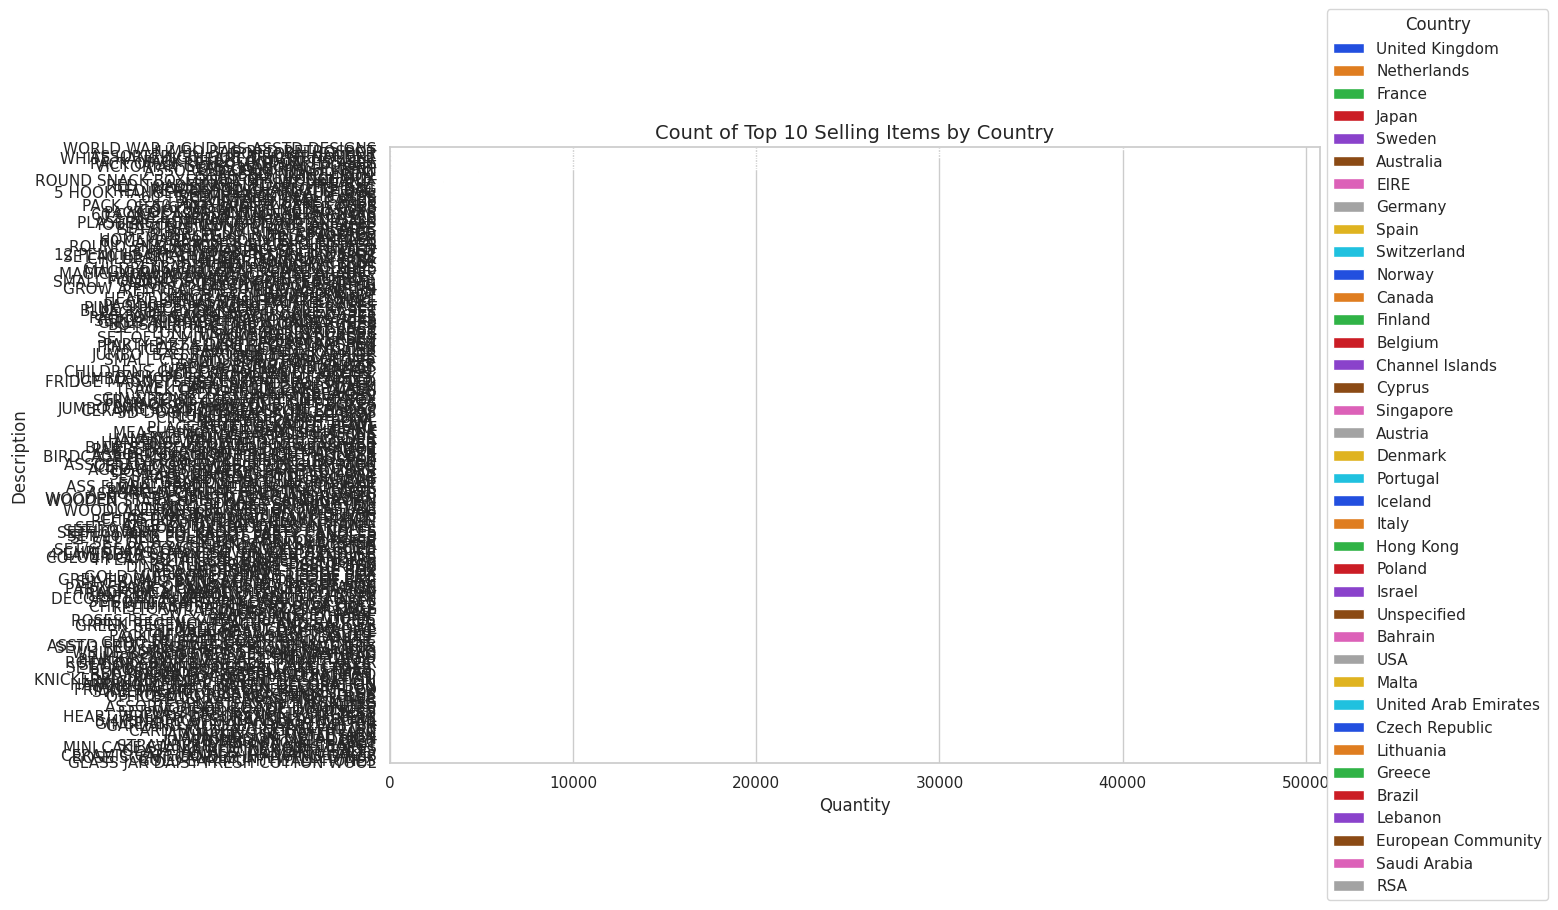

In [45]:

# Count of Top 10 Selling Items by Country
top_10_items_by_country = df.groupby(['Country', 'Description'])['Quantity'].sum().reset_index()
top_10_items_by_country = top_10_items_by_country.sort_values(by='Quantity', ascending=False).groupby('Country').head(10)

# Plotting the count of top 10 selling items by country
sns.set_style('whitegrid')
plt.figure(figsize=(12, 8))
h = sns.barplot(x='Quantity', y='Description', hue='Country', data=top_10_items_by_country, palette='bright')
h.set_xlabel('Quantity', size=12)
h.set_ylabel('Description', size=12)
h.set_title('Count of Top 10 Selling Items by Country', size=14)
plt.legend(title='Country', loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

/home/saurabh/Projects/session_based_recommenders/env/lib/python3.7/site-packages/ipykernel_launcher.py:14: UserWarning: FixedFormatter should only be used together with FixedLocator
  


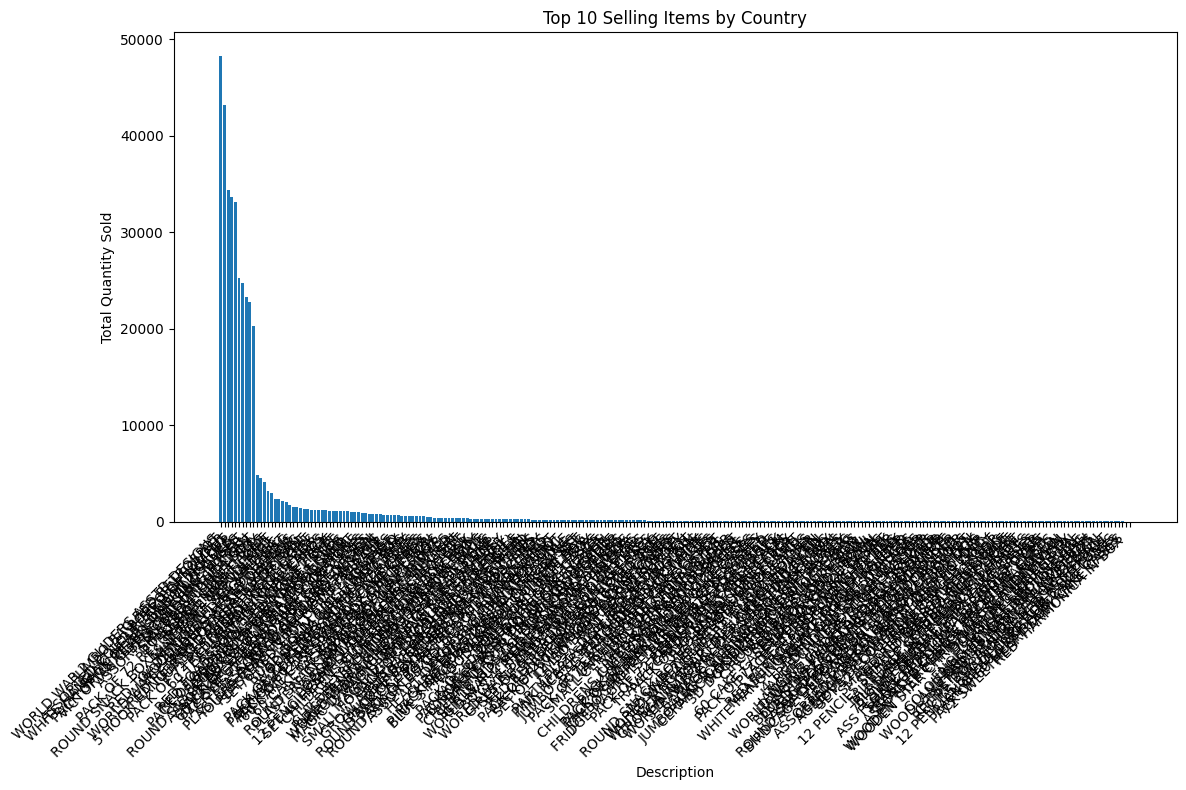

In [28]:
# Calculate the total quantity of each item sold in each country
top_10_items_by_country = df.groupby(['Country', 'Description'])['Quantity'].sum().reset_index()

# Sort by quantity in descending order and get the top 10 items for each country
top_10_items_by_country = top_10_items_by_country.sort_values(by='Quantity', ascending=False)
top_10_items_by_country = top_10_items_by_country.groupby('Country').head(10)

# Create the bar plot
fig, ax = plt.subplots(figsize=(12, 8))
ax.bar(top_10_items_by_country['Description'], top_10_items_by_country['Quantity'])
ax.set_xlabel('Description')
ax.set_ylabel('Total Quantity Sold')
ax.set_title('Top 10 Selling Items by Country')
ax.set_xticklabels(top_10_items_by_country['Description'], rotation=45, ha='right')

plt.tight_layout()
plt.show()

9.Top 10 Selling Item by Quantity

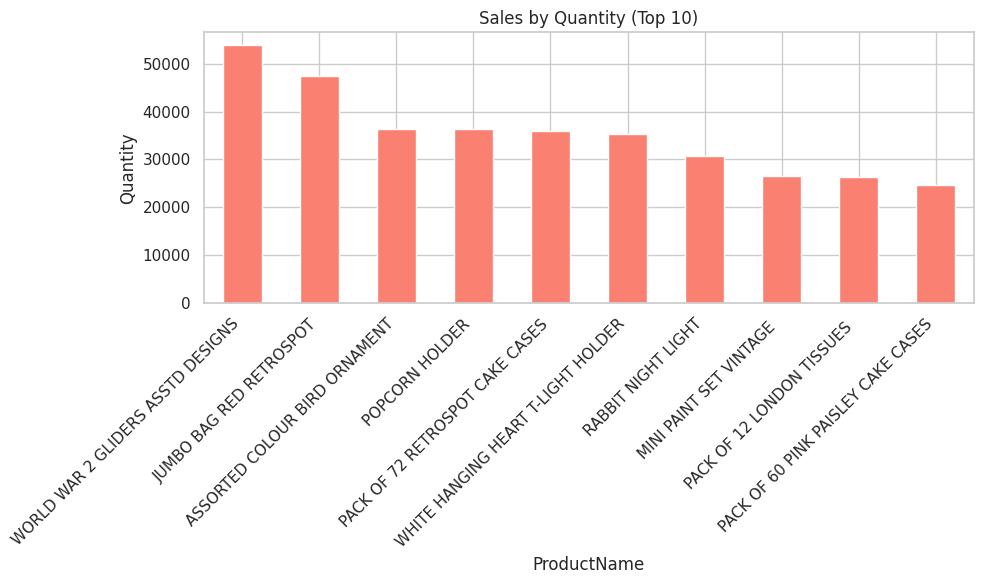

{"WORLD WAR 2 GLIDERS ASSTD DESIGNS": 53847, "JUMBO BAG RED RETROSPOT": 47363, "ASSORTED COLOUR BIRD ORNAMENT": 36381, "POPCORN HOLDER": 36334, "PACK OF 72 RETROSPOT CAKE CASES": 36039, "WHITE HANGING HEART T-LIGHT HOLDER": 35317, "RABBIT NIGHT LIGHT": 30680, "MINI PAINT SET VINTAGE ": 26437, "PACK OF 12 LONDON TISSUES ": 26315, "PACK OF 60 PINK PAISLEY CAKE CASES": 24753}


In [65]:
df = pd.read_csv('/home/saurabh/Projects/session_based_recommenders/data/OnlineRetail.csv', encoding = 'unicode_escape')
# Visualize the top selling products
top_products = df.groupby('Description')['Quantity'].sum().nlargest(10)
# sns.barplot( x=top_products.index, y=top_products.values, orient="v")

top_products.head(10).plot(kind='bar', figsize=(10, 6), color='salmon')
plt.xlabel('ProductName')
plt.ylabel('Quantity')
plt.title('Sales by Quantity (Top 10)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Convert the pandas Series to a dictionary
top_products_dict = top_products.to_dict()

# Store the dictionary as a JSON object
top_products_dictjson_object = json.dumps(top_products_dict)
print(top_products_dictjson_object)


3. Exclude UK

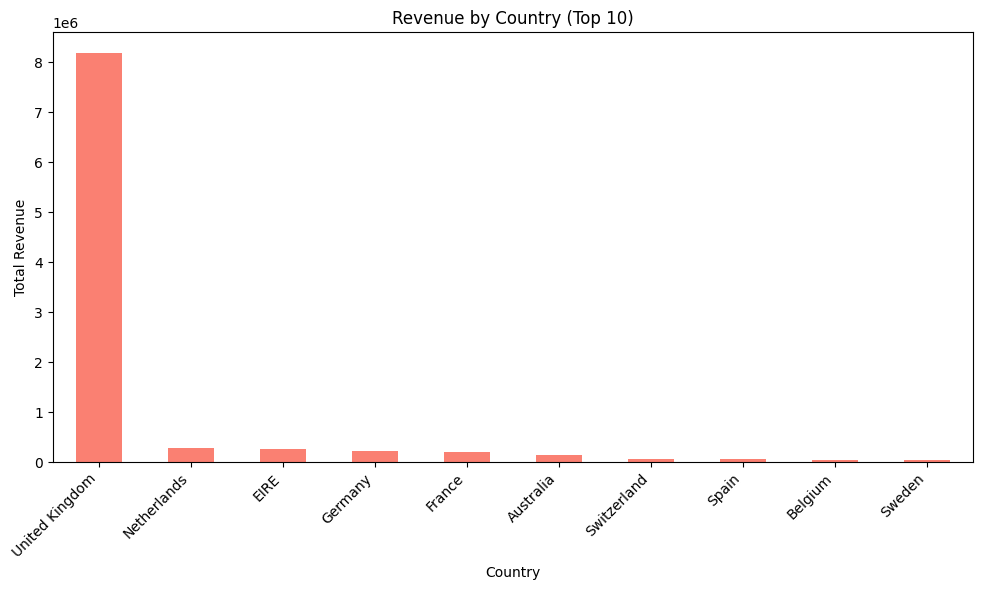

{"United Kingdom": 8187806.364001113, "Netherlands": 284661.54000000015, "EIRE": 263276.81999999826, "Germany": 221698.20999999862, "France": 197403.90000000002, "Australia": 137077.26999999973, "Switzerland": 56385.35000000009, "Spain": 54774.57999999997, "Belgium": 40910.95999999998, "Sweden": 36595.91, "Japan": 35340.62, "Norway": 35163.46000000004, "Portugal": 29367.019999999993, "Finland": 22326.73999999997, "Channel Islands": 20086.289999999957, "Denmark": 18768.140000000003, "Italy": 16890.510000000002, "Cyprus": 12946.289999999999, "Austria": 10154.319999999996, "Hong Kong": 10117.040000000003, "Singapore": 9120.39, "Israel": 7907.819999999995, "Poland": 7213.139999999997, "Unspecified": 4749.789999999996, "Greece": 4710.5199999999995, "Iceland": 4309.999999999997, "Canada": 3666.380000000001, "Malta": 2505.4700000000003, "United Arab Emirates": 1902.2800000000007, "USA": 1730.9200000000005, "Lebanon": 1693.8800000000003, "Lithuania": 1661.06, "European Community": 1291.75, "Br

In [35]:
# Revenue by Country (Top 10) - Show the total sales values
df['Revenue'] = df['Quantity'] * df['UnitPrice']
revenue_by_country = df.groupby('Country')['Revenue'].sum().sort_values(ascending=False)
revenue_by_country.head(10).plot(kind='bar', figsize=(10, 6), color='salmon')
plt.xlabel('Country')
plt.ylabel('Total Revenue')
plt.title('Revenue by Country (Top 10)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


# Convert the pandas Series to a dictionary
revenue_by_country_dict = revenue_by_country.to_dict()

# Store the dictionary as a JSON object
json_object_revenue_by_country = json.dumps(revenue_by_country_dict)
print(json_object_revenue_by_country)

Monthly Revenue Trends

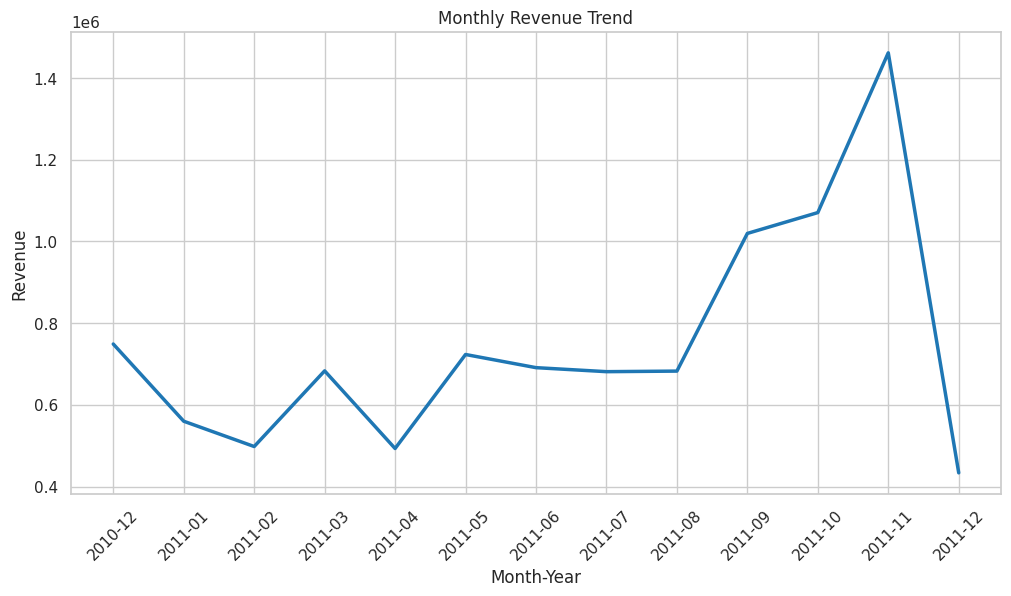

{"index": [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12], "columns": ["MonthYear", "TotalSales"], "data": [["2010-12", 748957.0199999774], ["2011-01", 560000.2600000234], ["2011-02", 498062.6500000268], ["2011-03", 683267.0800000189], ["2011-04", 493207.1210000249], ["2011-05", 723333.51000001], ["2011-06", 691123.1200000228], ["2011-07", 681300.1110000301], ["2011-08", 682680.5100000176], ["2011-09", 1019687.622000011], ["2011-10", 1070704.669999975], ["2011-11", 1461756.2499997574], ["2011-12", 433668.0100000171]]}


In [49]:
import json
# Extract month and year from 'InvoiceDate' column
df['MonthYear'] = df['InvoiceDate'].dt.to_period('M')
df['TotalSales'] = df['Quantity'] * df['UnitPrice']
# Calculate the monthly revenue
monthly_revenue = df.groupby('MonthYear')['TotalSales'].sum()

# Visualize the monthly revenue trend
plt.figure(figsize=(12, 6))
sns.lineplot(x=monthly_revenue.index.astype(str), y=monthly_revenue.values)
plt.title('Monthly Revenue Trend')
plt.xlabel('Month-Year')
plt.ylabel('Revenue')
plt.xticks(rotation=45)
plt.show()

# Convert monthly revenue to JSON
monthly_revenue_json = monthly_revenue.reset_index()
monthly_revenue_json['MonthYear'] = monthly_revenue_json['MonthYear'].astype(str) # Convert Period to string
monthly_revenue_json = monthly_revenue_json.to_dict(orient='split')
monthly_revenue_json = json.dumps(monthly_revenue_json)

# Print the JSON
print(monthly_revenue_json)

In [51]:
data = pd.read_csv('/home/saurabh/Projects/session_based_recommenders/data/OnlineRetail.csv', encoding = 'unicode_escape')
# from the data info, description and CustomerID have null value
data = data.dropna()

# CustomerID should be string,InvoiceDate should be date
data['CustomerID'] = data['CustomerID'].astype(str)
data['InvoiceDate'] = data['InvoiceDate'].astype('datetime64[ns]')

# Keep the last two words as the type of products
a = data['Description'].str.split()
data['Type'] = a.apply(lambda x: ' '.join(x[-2:]))

# Create Revenue columns in the table
data['Revenue']=data['Quantity']*data['UnitPrice']





In [55]:
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Type,Revenue
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,T-LIGHT HOLDER,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,METAL LANTERN,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,COAT HANGER,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,WATER BOTTLE,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,WHITE HEART.,20.34


Text(0, 0.5, 'Total Revenue')

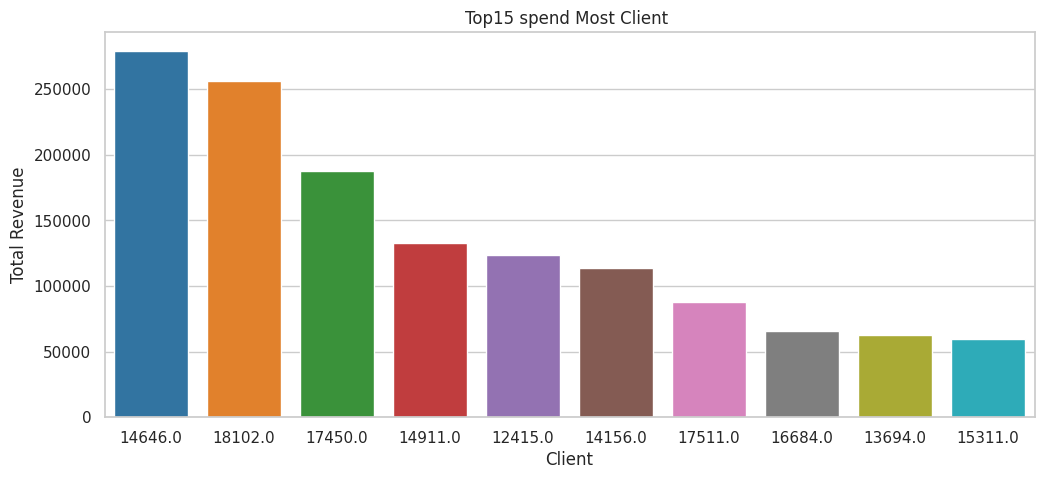

In [54]:
# Top15 spend Most Client
Rev_Coustomer=data.groupby('CustomerID')['Revenue'].sum().sort_values(ascending=False).reset_index()[:10]
#Visualize
plt.figure(figsize=(12,5))
sns.barplot(x='CustomerID', y='Revenue', data=Rev_Coustomer)
plt.title("Top15 spend Most Client ")
plt.xlabel('Client')
plt.ylabel('Total Revenue')

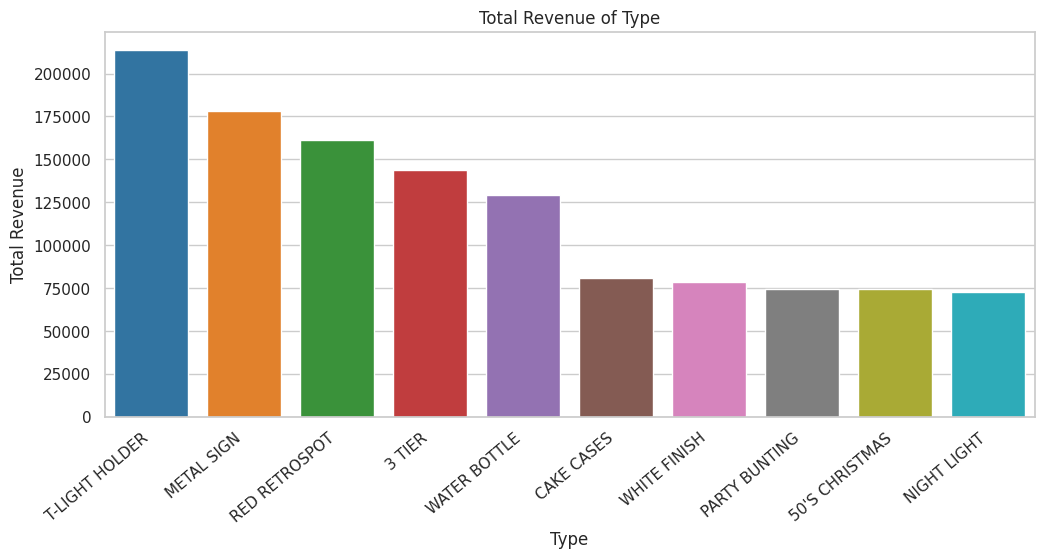

{"Type": {"0": "T-LIGHT HOLDER", "1": "METAL SIGN", "2": "RED RETROSPOT", "3": "3 TIER", "4": "WATER BOTTLE", "5": "CAKE CASES", "6": "WHITE FINISH", "7": "PARTY BUNTING", "8": "50'S CHRISTMAS", "9": "NIGHT LIGHT"}, "Revenue": {"0": 213835.37000000008, "1": 178001.68000000145, "2": 161061.26000000106, "3": 143840.8199999991, "4": 129329.51999999913, "5": 80566.17999999857, "6": 78321.47999999976, "7": 74439.83000000037, "8": 74187.07999999993, "9": 72412.31000000064}}


In [59]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data from the CSV file
df = pd.read_csv('/home/saurabh/Projects/session_based_recommenders/data/OnlineRetail.csv', encoding='unicode_escape')

# Drop rows with null values in Description and CustomerID columns
df = df.dropna(subset=['Description', 'CustomerID'])

# Convert CustomerID to string and InvoiceDate to datetime
df['CustomerID'] = df['CustomerID'].astype(str)
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

# Keep the last two words as the type of products
a = df['Description'].str.split()
df['Type'] = a.apply(lambda x: ' '.join(x[-2:]))

# Create a Revenue column in the dataframe
df['Revenue'] = df['Quantity'] * df['UnitPrice']

# Top 20 Most Revenue Type
# Get grouped of total Revenue and Type
Rev_Country = df.groupby('Type')['Revenue'].sum().sort_values(ascending=False).reset_index()[:10]

# Visualize the top 20 most revenue types
plt.figure(figsize=(12, 5))
sns.barplot(x='Type', y='Revenue', data=Rev_Country)
plt.xticks(rotation=40, ha='right')
plt.title("Total Revenue of Type")
plt.xlabel('Type')
plt.ylabel('Total Revenue')
plt.show()

# Convert the pandas Series to a dictionary
Rev_Country_dict = Rev_Country.to_dict()

# Store the dictionary as a JSON object
json_object_Rev_Country_dict = json.dumps(Rev_Country_dict)
print(json_object_Rev_Country_dict)



In [57]:
data['Type'].nunique()

2333

In [20]:
# Convert InvoiceDate to datetime
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

# Calculate RFM metrics
current_date = max(df['InvoiceDate']) + dt.timedelta(days=1)
rfm_data = df.groupby('CustomerID').agg({
    'InvoiceDate': lambda x: (current_date - x.max()).days,  # Recency
    'InvoiceNo': 'nunique',  # Frequency
    'Revenue': 'sum'  # Monetary value (assuming Revenue is calculated)
})

# Rename the columns
rfm_data.rename(columns={
    'InvoiceDate': 'Recency',
    'InvoiceNo': 'Frequency',
    'Revenue': 'Monetary'
}, inplace=True)

# Show the RFM data
print(rfm_data)

            Recency  Frequency  Monetary
CustomerID                              
12346.0         326          2      0.00
12347.0           2          7   4310.00
12348.0          75          4   1797.24
12349.0          19          1   1757.55
12350.0         310          1    334.40
...             ...        ...       ...
18280.0         278          1    180.60
18281.0         181          1     80.82
18282.0           8          3    176.60
18283.0           4         16   2094.88
18287.0          43          3   1837.28

[4372 rows x 3 columns]


Chart


ValueError: 'label' must be of length 'x'

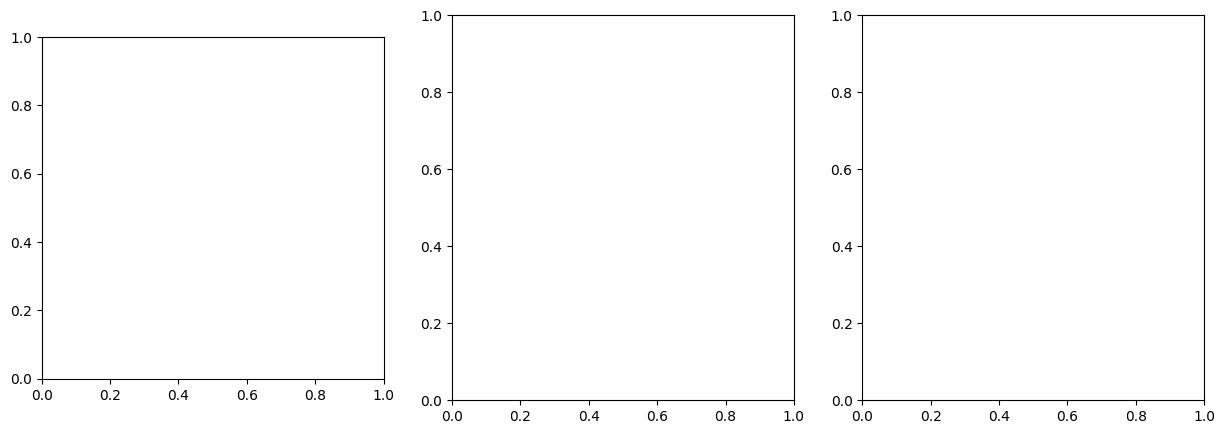

In [23]:
import matplotlib.pyplot as plt
import datetime as dt


# Convert InvoiceDate to datetime
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

# Calculate RFM metrics
current_date = max(df['InvoiceDate']) + dt.timedelta(days=1)
rfm_data = df.groupby('CustomerID').agg({
    'InvoiceDate': lambda x: (current_date - x.max()).days,  # Recency
    'InvoiceNo': 'nunique',  # Frequency
    'UnitPrice': 'sum'  # Monetary value (assuming UnitPrice is calculated)
})

# Rename the columns
rfm_data.rename(columns={
    'InvoiceDate': 'Recency',
    'InvoiceNo': 'Frequency',
    'UnitPrice': 'Monetary'
}, inplace=True)

# RFM segmentation based on quantiles
quantiles = rfm_data.quantile(q=[0.25, 0.5, 0.75])
rfm_segments = rfm_data.apply(lambda x: '1' if x['Recency'] <= quantiles.loc[0.25, 'Recency']
                             else '2' if x['Recency'] <= quantiles.loc[0.5, 'Recency']
                             else '3' if x['Recency'] <= quantiles.loc[0.75, 'Recency']
                             else '4', axis=1)

# Pie chart
segment_labels = ['Low', 'Medium', 'High']
recency_segment_counts = rfm_segments.value_counts()
frequency_segment_counts = rfm_segments.value_counts()
monetary_segment_counts = rfm_segments.value_counts()

fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Recency
axes[0].pie(recency_segment_counts, labels=segment_labels, autopct='%1.1f%%', startangle=90)
axes[0].set_title('Recency Segments')

# Frequency
axes[1].pie(frequency_segment_counts, labels=segment_labels, autopct='%1.1f%%', startangle=90)
axes[1].set_title('Frequency Segments')

# Monetary
axes[2].pie(monetary_segment_counts, labels=segment_labels, autopct='%1.1f%%', startangle=90)
axes[2].set_title('Monetary Segments')

plt.show()


In [13]:
# Extract unique StockIDs and Descriptions
unique_stock_data = df[['StockCode', 'Description']].drop_duplicates()

# Convert to JSON format
json_output = unique_stock_data.to_json(orient='records', lines=False)

print(json_output)

[{"StockCode":"85123A","Description":"WHITE HANGING HEART T-LIGHT HOLDER"},{"StockCode":"71053","Description":"WHITE METAL LANTERN"},{"StockCode":"84406B","Description":"CREAM CUPID HEARTS COAT HANGER"},{"StockCode":"84029G","Description":"KNITTED UNION FLAG HOT WATER BOTTLE"},{"StockCode":"84029E","Description":"RED WOOLLY HOTTIE WHITE HEART."},{"StockCode":"22752","Description":"SET 7 BABUSHKA NESTING BOXES"},{"StockCode":"21730","Description":"GLASS STAR FROSTED T-LIGHT HOLDER"},{"StockCode":"22633","Description":"HAND WARMER UNION JACK"},{"StockCode":"22632","Description":"HAND WARMER RED POLKA DOT"},{"StockCode":"84879","Description":"ASSORTED COLOUR BIRD ORNAMENT"},{"StockCode":"22745","Description":"POPPY'S PLAYHOUSE BEDROOM "},{"StockCode":"22748","Description":"POPPY'S PLAYHOUSE KITCHEN"},{"StockCode":"22749","Description":"FELTCRAFT PRINCESS CHARLOTTE DOLL"},{"StockCode":"22310","Description":"IVORY KNITTED MUG COSY "},{"StockCode":"84969","Description":"BOX OF 6 ASSORTED COL

In [ ]:
df.drop(['InvoiceNo'],axis='columns',inplace= True)


In [ ]:
df.info()
df.describe()


In [ ]:
df[df.columns[df.isnull().any()]].isnull().sum()
    

In [ ]:
df.dropna(subset=['Description','CustomerID'], how='all', inplace= True)


In [67]:
data = {
    "United Kingdom": 8187806.364001113,
    "Netherlands": 284661.54000000015,
    "EIRE": 263276.81999999826,
    "Germany": 221698.20999999862,
    "France": 197403.90000000002,
    "Australia": 137077.26999999973,
    "Switzerland": 56385.35000000009,
    "Spain": 54774.57999999997,
    "Belgium": 40910.95999999998,
    "Sweden": 36595.91,
    "Japan": 35340.62,
    "Norway": 35163.46000000004,
    "Portugal": 29367.019999999993,
    "Finland": 22326.73999999997,
    "Channel Islands": 20086.289999999957,
    "Denmark": 18768.140000000003,
    "Italy": 16890.510000000002,
    "Cyprus": 12946.289999999999,
    "Austria": 10154.319999999996,
    "Hong Kong": 10117.040000000003,
    "Singapore": 9120.39,
    "Israel": 7907.819999999995,
    "Poland": 7213.139999999997,
    "Unspecified": 4749.789999999996,
    "Greece": 4710.5199999999995,
    "Iceland": 4309.999999999997,
    "Canada": 3666.380000000001,
    "Malta": 2505.4700000000003,
    "United Arab Emirates": 1902.2800000000007,
    "USA": 1730.9200000000005,
    "Lebanon": 1693.8800000000003,
    "Lithuania": 1661.06,
    "European Community": 1291.75,
    "Brazil": 1143.6000000000001,
    "RSA": 1002.3099999999998,
    "Czech Republic": 707.72,
    "Bahrain": 548.4,
    "Saudi Arabia": 131.17
}

# Convert values to million with two decimal points
data_million = {country: round(value / 1000000, 2) for country, value in data.items()}

# Print the result
print(data_million)


{'United Kingdom': 8.19, 'Netherlands': 0.28, 'EIRE': 0.26, 'Germany': 0.22, 'France': 0.2, 'Australia': 0.14, 'Switzerland': 0.06, 'Spain': 0.05, 'Belgium': 0.04, 'Sweden': 0.04, 'Japan': 0.04, 'Norway': 0.04, 'Portugal': 0.03, 'Finland': 0.02, 'Channel Islands': 0.02, 'Denmark': 0.02, 'Italy': 0.02, 'Cyprus': 0.01, 'Austria': 0.01, 'Hong Kong': 0.01, 'Singapore': 0.01, 'Israel': 0.01, 'Poland': 0.01, 'Unspecified': 0.0, 'Greece': 0.0, 'Iceland': 0.0, 'Canada': 0.0, 'Malta': 0.0, 'United Arab Emirates': 0.0, 'USA': 0.0, 'Lebanon': 0.0, 'Lithuania': 0.0, 'European Community': 0.0, 'Brazil': 0.0, 'RSA': 0.0, 'Czech Republic': 0.0, 'Bahrain': 0.0, 'Saudi Arabia': 0.0}
